# Data Introduction

In [73]:
#importing the essential libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
# loading the data
df = pd.read_csv("data.csv")

In [75]:
#shape of our data
df.shape

(30697, 25)

In [76]:
# a berief sample of the data
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


# Cleaning and preprocessing the Data

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## 1. Removing duplicates

### removing duplicate values for avoiding bias and ... in our training section.

In [78]:
df.drop_duplicates(inplace=True)

## 2. Standardize capitalization (all to lower case)

### Standardization of the string (object) data types.

In [79]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)

## 3. Handle missing values

### removing rows with the missing values or Nan, because this will make some troubles in the model training section.

In [80]:
df.dropna(axis='rows')

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,jump shot,jump shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2pt field goal,left side(l),mid-range,8-16 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,2
2,jump shot,jump shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2pt field goal,left side center(lc),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,3
3,jump shot,jump shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2pt field goal,right side center(rc),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,4
4,driving dunk shot,dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2pt field goal,center(c),restricted area,less than 8 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,5
5,jump shot,jump shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2pt field goal,left side(l),mid-range,8-16 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,driving layup shot,layup,382,49900088,34.0443,0,0,-118.2698,7,4,...,2pt field goal,center(c),restricted area,less than 8 ft.,1610612747,los angeles lakers,2000-06-19,lal vs. ind,ind,30692
30692,jump shot,jump shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2pt field goal,center(c),in the paint (non-ra),less than 8 ft.,1610612747,los angeles lakers,2000-06-19,lal vs. ind,ind,30693
30694,running jump shot,jump shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2pt field goal,left side center(lc),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-06-19,lal vs. ind,ind,30695
30695,jump shot,jump shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3pt field goal,center(c),above the break 3,24+ ft.,1610612747,los angeles lakers,2000-06-19,lal vs. ind,ind,30696


# Data Visualization

### At first glance, we want to know the rate of success and failure shots made by kobe bryan.

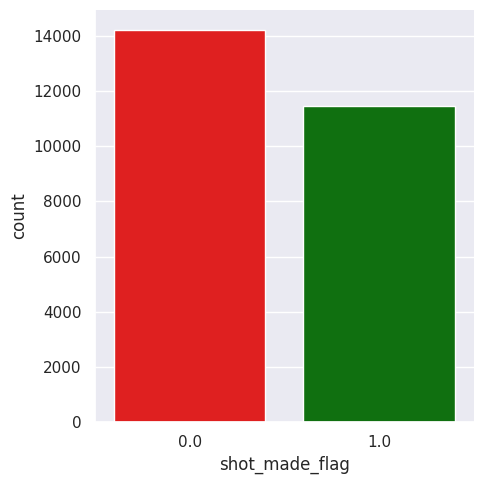

In [81]:
sns.catplot(data=df, x="shot_made_flag", kind="count", palette={0: "red",1: "green"})

### This the visualisation for success shot rate based on the shot location on the field with x and y parameters.

<Axes: xlabel='loc_x', ylabel='loc_y'>

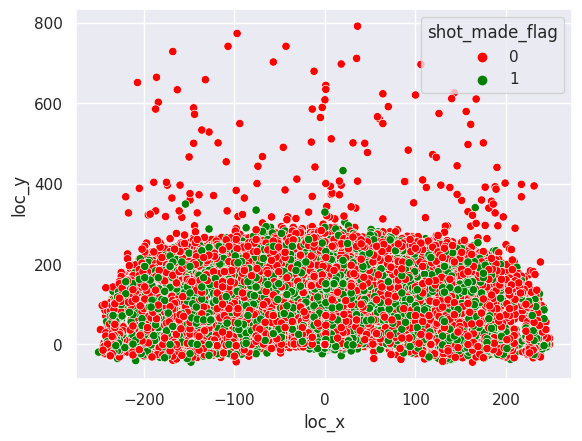

In [82]:
sns.scatterplot(data=df, x='loc_x', y='loc_y', hue='shot_made_flag', hue_order=[0,1],
                palette={0: "red",1: "green"})

#### This visualisation is for comparing the count of the success shots based on the time remaining for the match.

<Axes: xlabel='minutes_remaining', ylabel='count'>

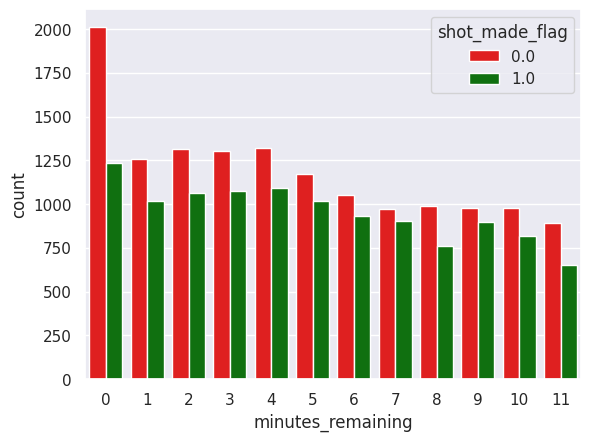

In [83]:
sns.countplot(data = df, x='minutes_remaining', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

#### This visualisation is for comparing the count of the success shots based on the shot zone.

<Axes: xlabel='shot_zone_area', ylabel='count'>

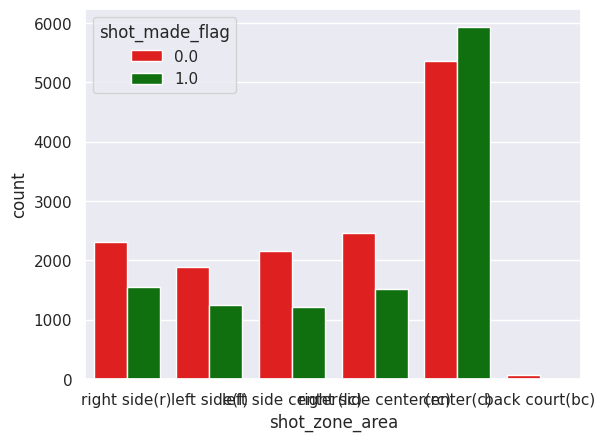

In [84]:
sns.countplot(data = df, x='shot_zone_area', hue='shot_made_flag',palette={0.0: "red",1.0: "green"})

### here we want to show the shots success rate based on the year the cobe was playing

<Axes: xlabel='game_year', ylabel='count'>

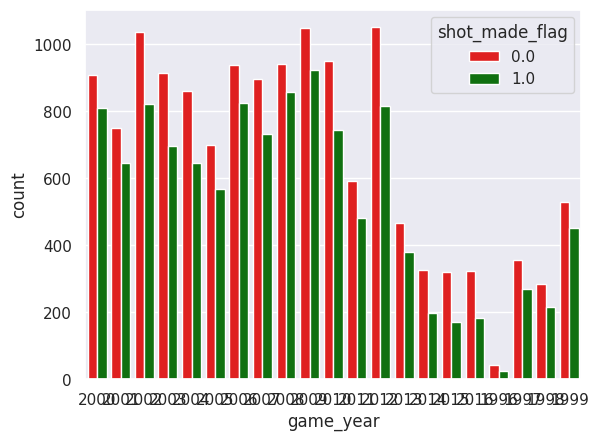

In [85]:
# adding a year column to the dataset
df['game_year'] = df['game_date'].str.split('-', expand=True)[0]

sns.countplot(data = df, x='game_year', hue='shot_made_flag', palette={0.0: "red",1.0: "green"})

In [86]:
#df.to_csv('modified_data.csv', index=False)

# Feature Engineering

In [87]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id',
       'game_year'],
      dtype='object')

In [88]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,game_year
0,jump shot,jump shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,right side(r),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,1,2000
1,jump shot,jump shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,left side(l),mid-range,8-16 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,2,2000
2,jump shot,jump shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,left side center(lc),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,3,2000
3,jump shot,jump shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,right side center(rc),mid-range,16-24 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,4,2000
4,driving dunk shot,dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,center(c),restricted area,less than 8 ft.,1610612747,los angeles lakers,2000-10-31,lal @ por,por,5,2000


In [89]:
df = df.drop(['lat', 'lon', 'team_name', 'team_id', 'game_date'], axis=1)

In [90]:
df = df.drop(['shot_id'], axis=1)

In [91]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,loc_x,loc_y,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,matchup,opponent,game_year
0,jump shot,jump shot,10,20000012,167,72,10,1,0,2000-01,27,18,NaN,2pt field goal,right side(r),mid-range,16-24 ft.,lal @ por,por,2000
1,jump shot,jump shot,12,20000012,-157,0,10,1,0,2000-01,22,15,0.0,2pt field goal,left side(l),mid-range,8-16 ft.,lal @ por,por,2000
2,jump shot,jump shot,35,20000012,-101,135,7,1,0,2000-01,45,16,1.0,2pt field goal,left side center(lc),mid-range,16-24 ft.,lal @ por,por,2000
3,jump shot,jump shot,43,20000012,138,175,6,1,0,2000-01,52,22,0.0,2pt field goal,right side center(rc),mid-range,16-24 ft.,lal @ por,por,2000
4,driving dunk shot,dunk,155,20000012,0,0,6,2,0,2000-01,19,0,1.0,2pt field goal,center(c),restricted area,less than 8 ft.,lal @ por,por,2000


In [92]:
df = pd.get_dummies(data = df , columns=['shot_type' , 'combined_shot_type' , 'shot_zone_area' , 'shot_zone_basic' , 'opponent' , 'matchup' , 'action_type'])

df = df.drop(['game_event_id' , 'game_id' , 'season'  , 'seconds_remaining']  , axis = 1)

df

,loc_x,loc_y,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,shot_zone_range,game_year,shot_type_2pt field goal,...,action_type_slam dunk shot,action_type_step back jump shot,action_type_tip layup shot,action_type_tip shot,action_type_turnaround bank shot,action_type_turnaround fadeaway bank jump shot,action_type_turnaround fadeaway shot,action_type_turnaround finger roll shot,action_type_turnaround hook shot,action_type_turnaround jump shot
0,167,72,10,1,0,18,NaN,16-24 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
1,-157,0,10,1,0,15,0.0,8-16 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
2,-101,135,7,1,0,16,1.0,16-24 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
3,138,175,6,1,0,22,0.0,16-24 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,6,2,0,0,1.0,less than 8 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,1,48,6,4,1,4,0.0,less than 8 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
30693,0,0,6,4,1,0,NaN,less than 8 ft.,2000,1,...,0,0,0,1,0,0,0,0,0,0
30694,-134,166,3,4,1,21,1.0,16-24 ft.,2000,1,...,0,0,0,0,0,0,0,0,0,0
30695,31,267,2,4,1,26,0.0,24+ ft.,2000,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df.dropna(axis  = 0 , inplace = True)

In [94]:
df['shot_zone_range'].value_counts()

from sklearn.preprocessing import OrdinalEncoder

distance_order = ['less than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.', 'back court shot']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[distance_order], dtype=int)


new = ordinal_encoder.fit_transform(df[['shot_zone_range']])
new


array([[1],
       [2],
       [2],
       ...,
       [2],
       [3],
       [0]])

In [95]:
df['shot_zone_range'] = new


df.dropna(axis = 0 , inplace = True)

In [96]:
df.playoffs.value_counts()

0    21939
1     3758
Name: playoffs, dtype: int64

In [97]:
X = df.drop('shot_made_flag', axis=1)  # Replace 'target_column' with the actual target column name
y = df['shot_made_flag']

# PCA ALGORITHM TO REDUCE THE DIMENTION OF THE DATA


Principal Component Analysis (PCA) is a dimensionality reduction
technique that can be used to reduce the number of features in your dataset while retaining most of the variance. To perform PCA and keep 95% of the variance, you can follow these steps:

In [98]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 95% variance
num_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Print the number of components selected
print(f"Number of components to keep 90% variance: {num_components}")

# Now, X_pca contains the transformed data with reduced dimensions
# You can use X_pca for further analysis or modeling

Number of components to keep 90% variance: 119


# Handle **Imbalance** data


Handling imbalanced data using methods that generate synthetic data is a common approach to address the issue. One popular technique for this purpose is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by creating synthetic examples in the feature space of the minority class, thereby balancing the class distribution. Here's a step-by-step guide on how to use SMOTE to handle imbalanced data:

In [99]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [100]:


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [101]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [102]:
y_train_resampled.value_counts()    #check whether the data is balance or not

1.0    11345
0.0    11345
Name: shot_made_flag, dtype: int64

# Implement 3 different algorithm on data - Logistic regression - support vector machine and random forest

In [103]:
from sklearn.model_selection import  GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [104]:
# Assuming X_train_resampled and y_train_resampled are obtained using SMOTE
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the classifiers with default hyperparameters

lr_classifier = LogisticRegression(random_state=42)

# Fit the models

lr_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate the models on the training set

lr_accuracy_train = lr_classifier.score(X_train_resampled_scaled, y_train_resampled)

# Print the results

print(f'Logistic Regression Training Accuracy: {lr_accuracy_train:.4f}')

Logistic Regression Training Accuracy: 0.6502


In [105]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming rf_classifier is the trained Random Forest model
# Assuming X_test_scaled is the scaled test set and y_test is the true labels

# Predictions on the test set

y_pred = lr_classifier.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Test Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[2043  844]
 [1019 1234]]
Precision: 0.5938
Recall: 0.5477
F1 Score: 0.5698
Test Accuracy: 0.6375
